# Google Playstore Apps rating Prediction

**Objective:**

 To analyze the Google Play Store dataset and draw useful insights using exploratory data analysis (EDA), visualization, and machine learning techniques. The dataset contains various app-related attributes such as ratings, reviews, price, size, installs, and more. We will clean the data, perform EDA, and use visualizations to uncover
 hidden patterns and trends.

## Data Preprocessing

In [104]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [106]:
#load the dataset
df=pd.read_csv("/content/googleplaystore.csv")

In [107]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [108]:
df.shape

(10841, 13)

In [109]:
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [110]:
df.dropna(subset=['Rating', 'Reviews', 'Size', 'Installs'], inplace=True)
df['Content Rating'].fillna(df['Content Rating'].mode()[0], inplace=True)
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)

/tmp/ipython-input-110-826928287.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Content Rating'].fillna(df['Content Rating'].mode()[0], inplace=True)
/tmp/ipython-input-110-826928287.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [111]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [112]:
# Convert 'Reviews'
df['Reviews'] = df['Reviews'].replace('3.0M', '3000000').astype(float)

# Convert 'Installs'
df['Installs'] = df['Installs'].astype(str)
df['Installs'] = df['Installs'].str.replace(',', '').str.replace(r'[+,]', '', regex=True)
df['Installs'] = df['Installs'].replace('Free', np.nan)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Convert 'Price'
df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = df['Price'].replace('Everyone', np.nan)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Convert 'Size'
def convert_size(size):
    if pd.isna(size):
        return np.nan
    if 'M' in size:
        return float(size.replace('M', '')) * 1000
    elif 'k' in size:
        return float(size.replace('k', ''))
    else:
        return np.nan

df['Size'] = df['Size'].astype(str)
df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].apply(convert_size)

In [113]:
df.drop_duplicates(inplace=True)


## Exploratory Data Analysis (EDA)

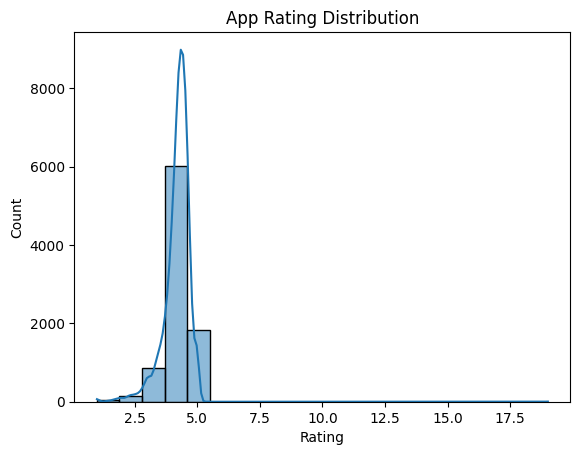

In [114]:
#Rating Distribution
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("App Rating Distribution")
plt.show()


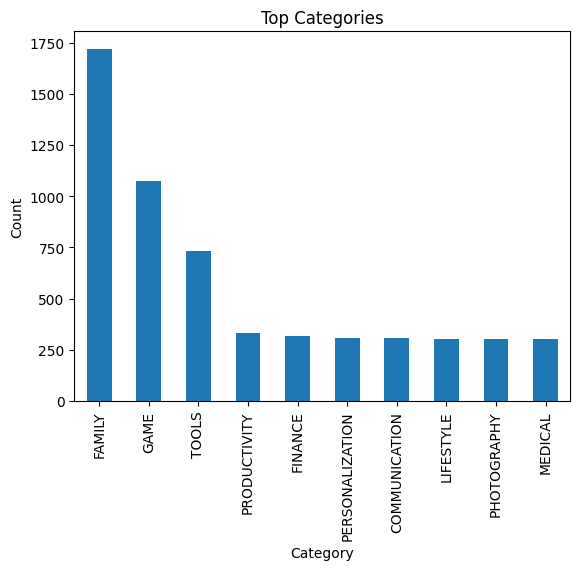

In [115]:
#Top Categories
df['Category'].value_counts().head(10).plot(kind='bar')
plt.title("Top Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

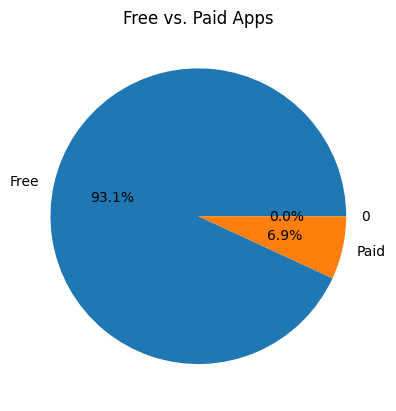

In [116]:
#Free VS Paid
df['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Free vs. Paid Apps")
plt.ylabel("")
plt.show()

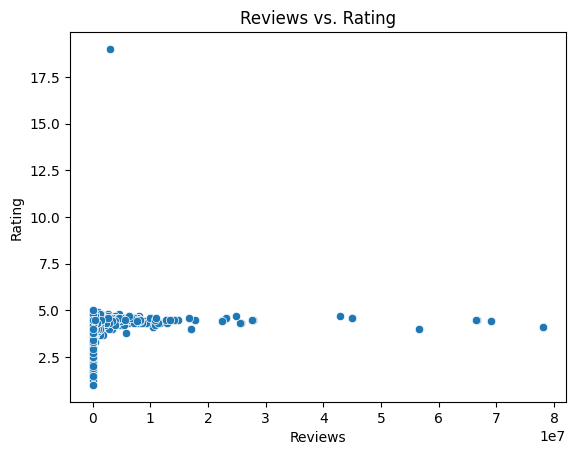

In [117]:
#Correlation: Reviews vs Rating
sns.scatterplot(x='Reviews', y='Rating', data=df)
plt.title("Reviews vs. Rating")
plt.show()

## Feature Engineering

In [118]:
def label_rating(r):
    if pd.isna(r): return 'none'
    if r < 3: return 'low'
    elif r < 4: return 'average'
    else: return 'high'

df['rating_label'] = df['Rating'].apply(label_rating)


In [119]:
cols_to_encode = ['Category', 'Type', 'Content Rating', 'Genres']
label_enc = LabelEncoder()
for col in cols_to_encode:
    df[col] = label_enc.fit_transform(df[col])


In [120]:
df['Reviews_log'] = np.log1p(df['Reviews'])
df['Installs_log'] = np.log1p(df['Installs'])
df['Size_log'] = np.log1p(df['Size'])

In [121]:
# Convert 'Last Updated' to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

In [122]:
# Extract Year and Month
df['Updated_Year'] = df['Last Updated'].dt.year
df['Updated_Month'] = df['Last Updated'].dt.month

In [123]:
# Fill NA values if any in new columns
df['Updated_Year'] = df['Updated_Year'].fillna(df['Updated_Year'].mode()[0])
df['Updated_Month'] = df['Updated_Month'].fillna(df['Updated_Month'].mode()[0])

In [124]:
#Drop old columns if needed
df.drop(['Reviews', 'Installs', 'Size', 'Last Updated'], axis=1, inplace=True)

In [125]:
label_enc = LabelEncoder()

# Encode categorical features (you may have already done this earlier)
for col in ['Category', 'Type', 'Content Rating', 'Genres']:
    df[col] = label_enc.fit_transform(df[col])

##Model Training and Evaluation

###Random Forest  Regression

In [126]:

X = df[['Category', 'Reviews_log', 'Size_log', 'Installs_log', 'Type',
        'Price', 'Genres', 'Content Rating', 'Updated_Year', 'Updated_Month']]
y = df['Rating'].fillna(df['Rating'].median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [127]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [128]:
y_pred = rf.predict(X_test)

In [129]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 0.23281572757565092
R²: 0.17623862579497873


###GridSearchCV on Random Forest

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [132]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=2)

In [133]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [134]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [135]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [136]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R²:", r2)

MSE: 0.23155066034860627
R²: 0.18071475603009524


###XGBoost

In [137]:
from xgboost import XGBRegressor

In [138]:
xgb = XGBRegressor(n_estimators=150, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=150,
             n_jobs=None, num_parallel_tree=None, ...)

In [139]:
y_pred_xgb = xgb.predict(X_test)

In [140]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [141]:
print("XGBoost MSE:", mse_xgb)
print("XGBoost R²:", r2_xgb)

XGBoost MSE: 0.23979686141916276
XGBoost R²: 0.1515375952060043


### Grid SearchCV on XGBoost

In [142]:
xgb_model = XGBRegressor(random_state=42)


In [143]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

In [144]:
grid_xgb = GridSearchCV(estimator=xgb_model,
                        param_grid=param_grid,
                        cv=3,
                        scoring='r2',
                        verbose=2,
                        n_jobs=-1)

In [145]:
grid_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 6, 8],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='r2', verbose=2)

In [146]:
print("Best Parameters:", grid_xgb.best_params_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}


In [147]:
best_xgb = grid_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

In [148]:
print("MSE:", mean_squared_error(y_test, y_pred_best_xgb))
print("R²:", r2_score(y_test, y_pred_best_xgb))

MSE: 0.2354488205985703
R²: 0.16692207167058049


## Feature Importance

In [149]:
importances = best_model.feature_importances_

feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)
print(feature_imp_df)

          Feature  Importance
1     Reviews_log    0.271901
2        Size_log    0.172007
3    Installs_log    0.146626
0        Category    0.110681
9   Updated_Month    0.081264
6          Genres    0.073470
4            Type    0.062463
8    Updated_Year    0.043261
7  Content Rating    0.020501
5           Price    0.017825


/tmp/ipython-input-150-3712659669.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_imp_df, x='Importance', y='Feature', palette='viridis')


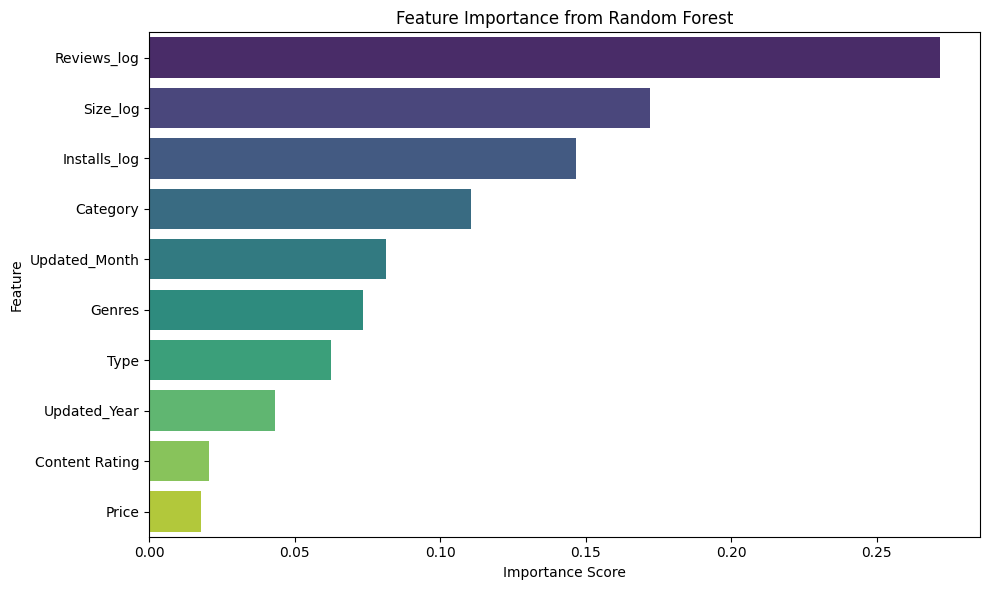

In [150]:
plt.figure(figsize=(10,6))
sns.barplot(data=feature_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()